<IPython.core.display.Javascript object>


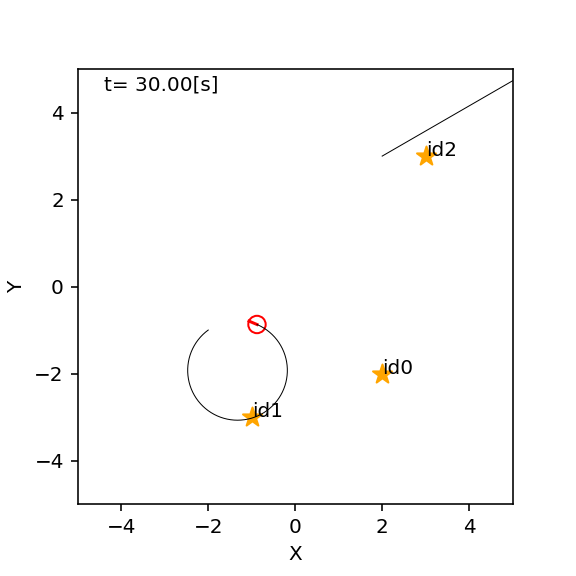

In [1]:
import sys
sys.path.append('../scripts/')
from kf import*

<IPython.core.display.Javascript object>


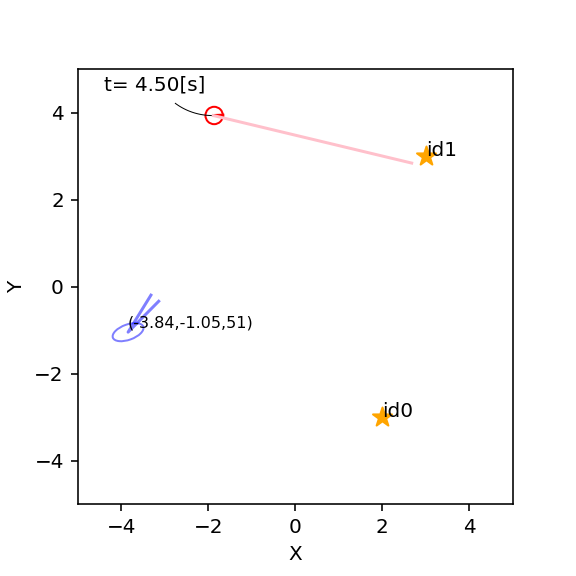

In [3]:
def trial(animation):
    time_interval = 0.1
    world = World(30,time_interval,debug = not animation)
    
    m = Map()
    for ln in [(2,-3),(3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)
    
    initial_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    robot_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    
    kf = KalmanFilter(m, initial_pose)
    a = EstimationAgent(time_interval,0.2,10.0 / 180 * math.pi,kf)
    r = Robot(robot_pose,sensor = Camera(m),agent = a,color = "red") # このカメラ、ファントム、オクルージョン...全部込み込み
    world.append(r)
    
    world.draw()
trial(True)

# わざと粒子とロボットの初期位置をずらして、合流できるか観察